## Build a K means model 


**Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will help you expand your skillset in a widely applicable way.   

This is a guided project that is part of the Google advanced Data Analytics. I did my first attempt and compare with the final results.

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Your will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

**Note:** Because this lab uses a real dataset, this notebook will first require basic EDA, data cleaning, and other manipulations to prepare the data for modeling. 

In [3]:
#import necessary libraries 
import pandas as pd 
import numpy as np 

#import tools for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#import visualization packages 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#load dataset 
penguins = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Machine_Learning_Python\Unsupervised learning\Clustering\K means\resources\penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


### 1. Data exploration 

In [6]:
#Check data shape 
penguins.shape

(344, 7)

In [7]:
#See data types 
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [16]:
#Check for duplicates 
penguins[penguins.duplicated]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [17]:
#See unique penguin species
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [20]:
#See how many values for each species 
penguins['species'].value_counts(dropna= False).reset_index()

,species,count
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


There are three types of penguin, and Chinstrap is less common than the other two. This unbalanced sample may affect K-Means clustering as K-Means performing best with similar sized groups. 

In [23]:
#Check for missing values 
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [25]:
#Drop rows with missing values 
penguins_subset = penguins.dropna(axis=0).reset_index(drop= True)
penguins_subset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


**Encode categorical data**

In [31]:
#Formet sex column to Uppercase to ensure consistent in formatting 
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

In [32]:
#Assign dummy variable to sex column
penguins_subset = pd.get_dummies(penguins_subset, drop_first= True, columns= ['sex'])
penguins_subset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,False
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,False
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,True


In [33]:
penguins_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex_MALE           333 non-null    bool   
dtypes: bool(1), float64(4), object(2)
memory usage: 16.1+ KB


In [34]:
#Change sex column from bool data type to integer numeric 
penguins_subset['sex_MALE'] = penguins_subset['sex_MALE'].astype(int)

In [35]:
penguins_subset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


**Drop unnessary columns**

In [37]:
#Drop the island column 
penguins_subset = penguins_subset.drop(['island'], axis = 1)

**Scale the features**

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

**Note:** Because the species column isn't a feature, it doesn't need to be scaled. 


In [40]:
#Assign data to X without the species column 
X = penguins_subset.drop(['species'], axis= 1)

#Scale the data features 
X_scaled = StandardScaler().fit_transform(X)

In [42]:
X_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618, -1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 , -1.00904996],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927,  0.99103121],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466, -1.00904996],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906,  0.99103121]])

### 2. Data modeling 

Fitting K-means and examining the inertia values for different values of K

In [48]:
# Fit K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2, 11)]
def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms= KMeans(n_clusters= num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia 

In [49]:
# Appply the function to calculate inertia for different K clusters 
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[885.622414365225,
 578.8284278107235,
 386.14534424773285,
 284.5464837898288,
 217.94583355138298,
 201.39287843423267,
 185.6049683475708,
 173.28480307333598,
 167.27056216926854]

Text(0, 0.5, 'inertia')

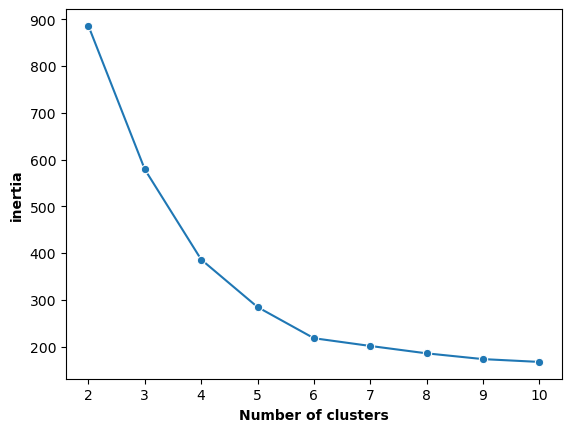

In [56]:
#Create a line plot to check the relationship between num_clusters and inertia 
sns.lineplot(x= num_clusters, y= inertia, marker= 'o')
plt.xlabel('Number of clusters', weight= 'bold')
plt.ylabel('inertia', weight= 'bold')

The plot seems to depict an elbow at six clusters, but there isn't a clear method for confirming that a six-cluster model is optimal. Therefore, the silhouette scores should be checked. 

In [59]:
#create a function to compute silhouette score for each k clusterings
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms= KMeans(n_clusters= num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score


In [60]:
#Apply the function 
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5257260332987354,
 0.47774022332151733,
 0.4213887558059968,
 0.3611605069259161,
 0.4036132056908919]

Text(0, 0.5, 'silhouette')

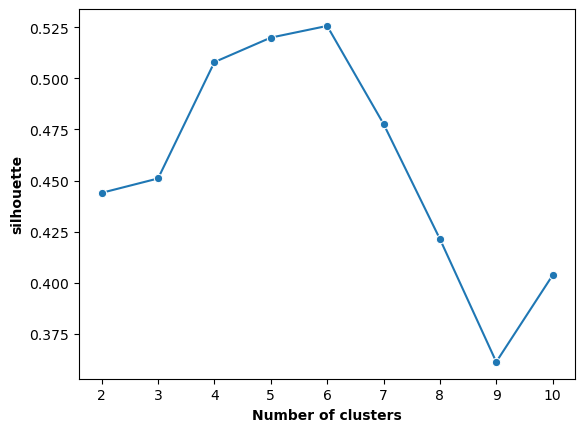

In [61]:
#Create a line plot to check the relationship between num_clusters and silhouette score
sns.lineplot(x= num_clusters, y= sil_score, marker= 'o')
plt.xlabel('Number of clusters', weight= 'bold')
plt.ylabel('silhouette', weight= 'bold')

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters, although five clusters also yield a relatively good silhouette score.

### 3. Optimal k-value 

In [63]:
# Fit a 6-cluster model 
kmeans6 = KMeans(n_clusters= 6, random_state = 42)
kmeans6.fit(X_scaled)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [64]:
# See unique cluster values 
print('unique labels: ', np.unique(kmeans6.labels_))

unique labels:  [0 1 2 3 4 5]


In [66]:
#Create a new cluster column 
penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,2
2,Adelie,40.3,18.0,195.0,3250.0,0,2
3,Adelie,36.7,19.3,193.0,3450.0,0,2
4,Adelie,39.3,20.6,190.0,3650.0,1,0


In [67]:
# Verify if any `cluster` can be differentiated by `species`.

penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Adelie       70
1        Gentoo       58
2        Adelie       73
         Chinstrap     5
3        Gentoo       61
4        Chinstrap    29
5        Adelie        3
         Chinstrap    34
dtype: int64

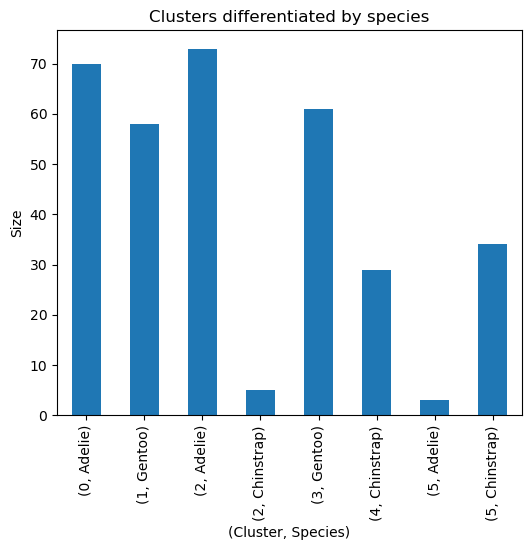

In [68]:
#Visualize the clusters
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

the results of the groupby show that each 'cluster' can be differentiated by 'species'

In [71]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.
penguins_subset.groupby(['cluster', 'species', 'sex_MALE']).size().sort_values(ascending= False)

cluster  species    sex_MALE
2        Adelie     0           73
0        Adelie     1           70
3        Gentoo     1           61
1        Gentoo     0           58
5        Chinstrap  1           34
4        Chinstrap  0           29
2        Chinstrap  0            5
5        Adelie     1            3
dtype: int64

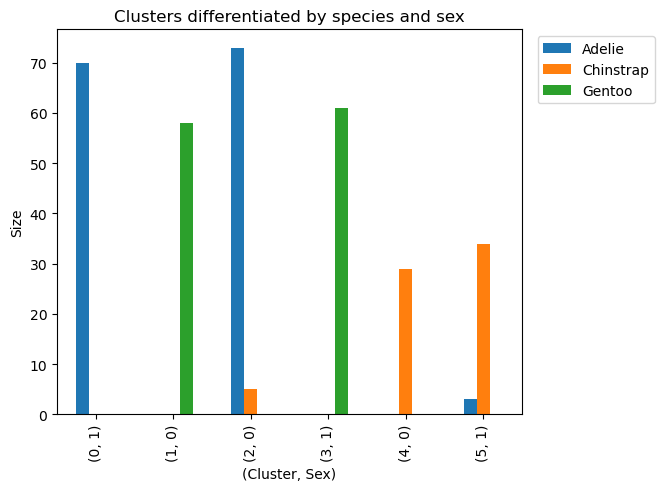

In [72]:
#visualize the clusters 
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

The graph shows that each 'cluster' can be differentiated by 'species' and 'sex_MALE'.

**What summary would you provide to stakeholders?**
*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
*  The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.